## Name: Sanchit Manchanda
## Task: Prediction Using Decision Tree Algorithm
## #GRIPAPRIL21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_data = pd.read_csv('iris.csv')

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data = iris_data.drop('Id',axis = 1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

#### Data is unbiased as there are equal number of classes for all the 3 species.

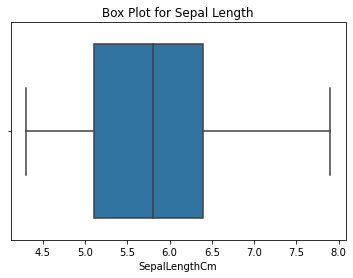

In [7]:
sns.boxplot(iris_data['SepalLengthCm'])
plt.title("Box Plot for Sepal Length")
plt.show()

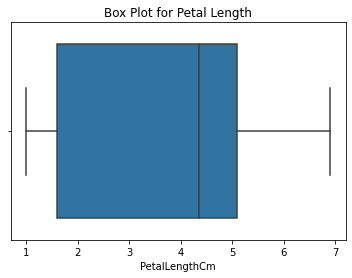

In [8]:
sns.boxplot(iris_data['PetalLengthCm'])
plt.title("Box Plot for Petal Length")
plt.show()

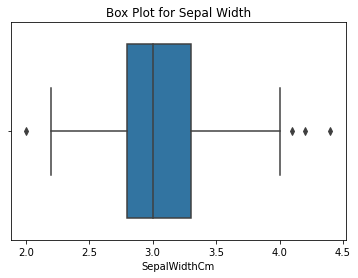

In [9]:
sns.boxplot(iris_data['SepalWidthCm'])
plt.title("Box Plot for Sepal Width")
plt.show()

#### We can see there are some outliers in Sepal Width

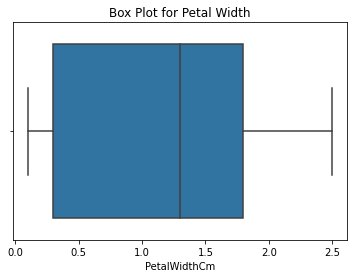

In [10]:
sns.boxplot(iris_data['PetalWidthCm'])
plt.title("Box Plot for Petal Width")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
iris_data['Species'] = le.fit_transform(iris_data['Species'])

In [14]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


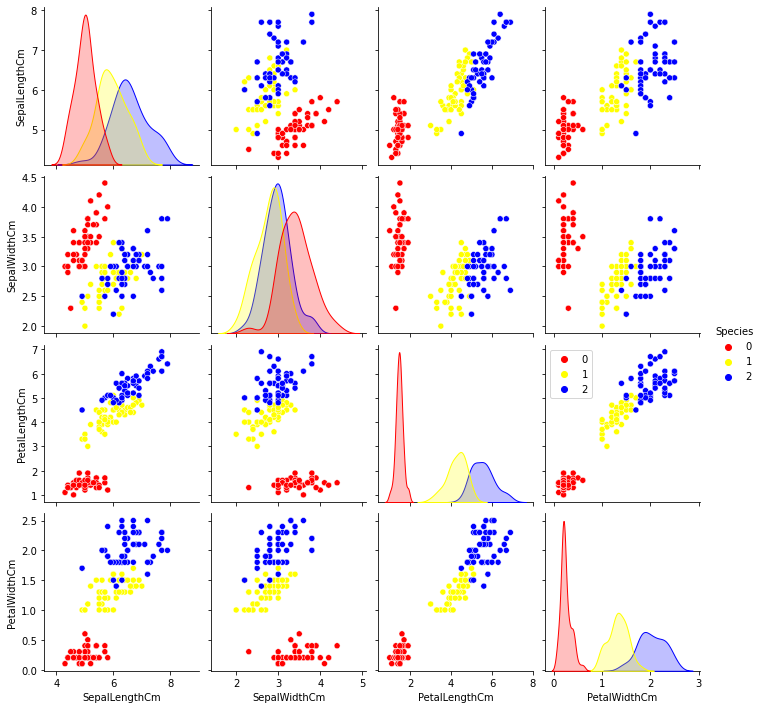

In [15]:
sns.pairplot(iris_data,hue = 'Species',palette = ['red','yellow','blue'])
plt.legend()
plt.show()

In [16]:
X = iris_data.iloc[:,:-1]
Y = iris_data.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33)

## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Accuracy on Training Set

In [22]:
model.score(X_train,y_train)

1.0

In [23]:
Y_pred = model.predict(X_train)

In [24]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [25]:
confusion_matrix(y_train,Y_pred)

array([[37,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 31]], dtype=int64)

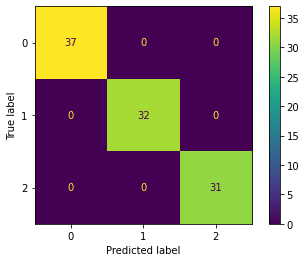

In [26]:
plot_confusion_matrix(model,X_train,y_train)

### Accuracy on Testing Set

In [27]:
model.score(X_test,y_test)

0.96

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
confusion_matrix(y_test,y_test_pred)

array([[13,  0,  0],
       [ 0, 16,  2],
       [ 0,  0, 19]], dtype=int64)

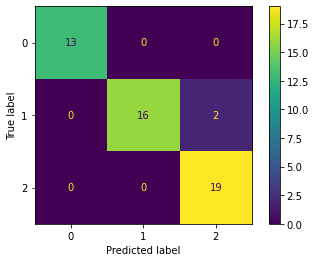

In [30]:
plot_confusion_matrix(model,X_test,y_test)

## Visualization of Decision Tree

In [31]:
from sklearn.tree import plot_tree

In [32]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
features = list(iris_data.iloc[:,:-1].columns)
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [34]:
classes = list(le.classes_)
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

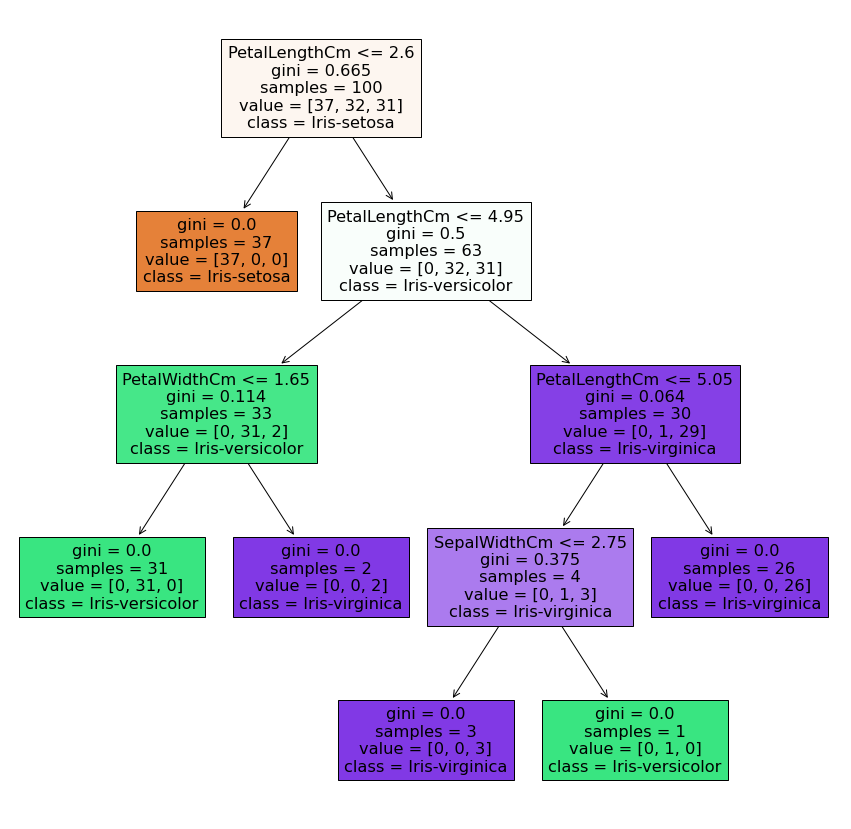

In [35]:
plt.figure(figsize = (15,15))
plot_tree(model,feature_names=features,class_names=classes,filled = True)
plt.show()